# 导入运行时需要的Package

In [1]:
import random
import numpy as np
from collections import deque
import sys
import cv2
import os
import logging
import logging.handlers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential, losses, models

sys.path.append(os.path.join('game/'))
print(tf.__version__)

# print('Headless Mode')
# os.environ['SDL_VIDEODRIVER'] = 'dummy'

2.4.1


# ++++++++++演示过程++++++++++

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
0 输入值 [0, 1] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
1 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
2 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
3 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
4 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
5 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
6 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
7 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
8 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
9 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
10 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
11 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
12 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
13 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
14 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
15 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOver= False
16 输入值 [1, 0] || 返回值 图片矩阵 略 奖励值= 0.1 是否GameOv

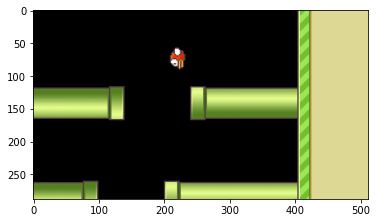

In [2]:
import wrapped_flappy_bird as game
import matplotlib.pyplot as plt

game_state = game.GameState()

# 输入为a_t (1, 0)代表不跳，(0,1)代表跳。
# 返回值为：
# nextObservation 是下一帧图像
# reward 是奖励(+0.1表示存活，+1表示通过管道，-1表示死亡)，奖励被控制在[-1,+1]来提高稳定性
# terminal 是一个布尔值表示游戏是否结束

replayMemory = deque()
for index, timeStep in enumerate(range(100)):# 捕捉第100张图片
    if timeStep % 19 == 0:
        action = [0, 1]#跳
    else:
        action = [1, 0]#不跳

    # 与智能体交互
    nextState, reward, terminal = game_state.frame_step(action)
    print(index, '输入值', action, '|| 返回值', '<图片矩阵>', '奖励值=', reward, '是否GameOver=', terminal)

    # 将新状态加入到经验池中，注意元素顺序(当前状态，行为，奖励，下个状态，是否GameOver)
    replayMemory.append((nextState, action, reward, nextState, terminal))

# 显示最后一帧图片
plt.imshow(nextState)
plt.show()

# 图片旋转90度

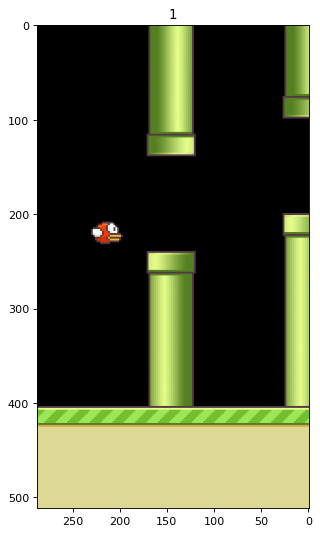

In [3]:
plt.figure(figsize=(20,8), dpi=80)
# 旋转90度
plt.imshow(np.rot90(np.rot90(np.rot90(nextState))))
plt.gca().invert_xaxis()
plt.title('1')
plt.show()

# 图像处理
调整大小 => 灰度化 => 二值化 => 4帧叠加

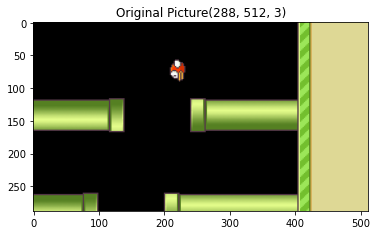

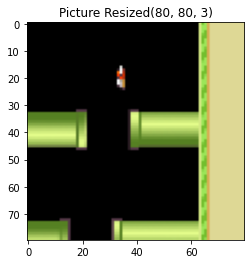

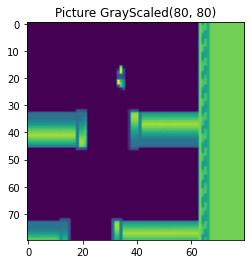

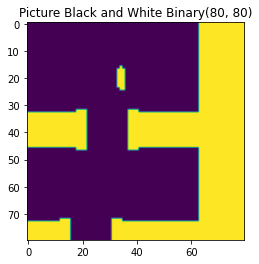

C:\Users\zfe5szh\Anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


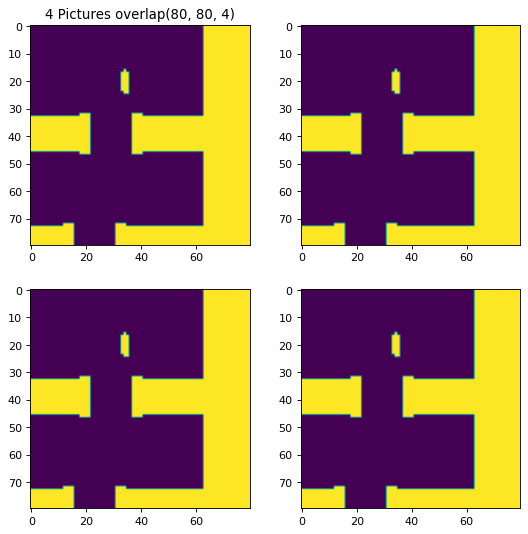

In [4]:
import pandas as pd

# 显示原始图片
plt.imshow(nextState)
plt.title('Original Picture' + str(nextState.shape))
plt.show()

# 裁剪成为80x80的小图片，但是依然是彩色的
x_t1_colored = cv2.resize(nextState, (80, 80))# (288, 512, 3)的图片裁剪成(80, 80, 3)的小图片
plt.imshow(x_t1_colored)
plt.title('Picture Resized' + str(x_t1_colored.shape))
plt.show()

# 将彩色图片转为灰度图
x_t1_gray = cv2.cvtColor(x_t1_colored, cv2.COLOR_BGR2GRAY)
plt.imshow(x_t1_gray)
plt.title('Picture GrayScaled' + str(x_t1_gray.shape))
plt.show()

# cv2.threshold(src, thresh, maxval, type[, dst]) → retval, dst
# 将一个灰色的图片，变成要么是白色要么就是黑色。（大于规定thresh值就是设置的最大值（常为255，也就是白色））
ret, x_t1_gray = cv2.threshold(x_t1_gray, 0, 255, cv2.THRESH_BINARY)# 将图片转为黑白二值
plt.imshow(x_t1_gray)
plt.title('Picture Black and White Binary' + str(x_t1_gray.shape))
plt.show()

# # x_t1_gray是一个(1x1x80x80) 的单帧，需要4帧的叠加
s_t1 = np.stack((x_t1_gray, x_t1_gray, x_t1_gray, x_t1_gray), axis=2)# np.stack的官方解释为 对指定axis增加维度

plt.figure(figsize=(8,8), dpi=80)
for i in range(1,5):
    plt.subplot(2,2,i)
    plt.imshow(s_t1[:,:,i-1])
    
plt.subplot(2,2,1)
plt.title('4 Pictures overlap'+ str(s_t1.shape))
plt.show()

# 旋转图片

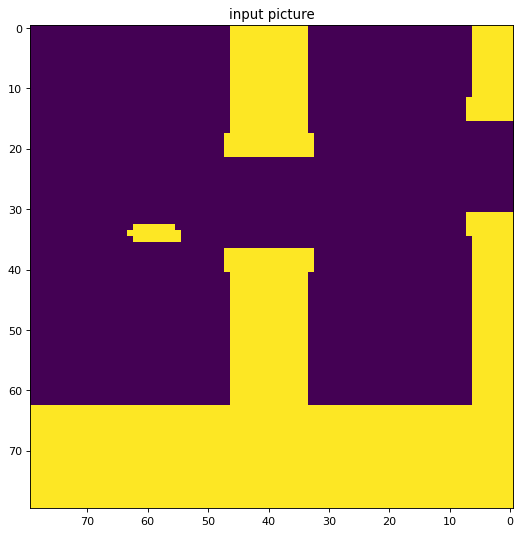

In [5]:
# 将图片数据导出csv文件
pd.DataFrame(x_t1_gray).to_csv('.\picture.csv')

plt.figure(figsize=(20,8), dpi=80)
plt.imshow(np.rot90(np.rot90(np.rot90(x_t1_gray))))
plt.gca().invert_xaxis()
plt.title('input picture')
plt.show()

# ++++++++++训练过程++++++++++

# 定义参数

In [ ]:
ACTIONS = 2 # number of valid actions
GAMMA = 0.99 # decay rate of past observations
OBSERVE = 5000 # timesteps to observe before training           预热期：不训练，主要是为了让记忆模块先积累一定数据
EXPLORE = OBSERVE + 20000 # frames over which to anneal epsilon 探索期：逐渐降低随机概率，从随机探索过渡到有向策略，并且每次从记忆模块中取出一些数据训练模型
TRAIN = 10000000                                              # 训练期：固定随机概率，进一步训练模型，使得Q函数进一步收敛

FINAL_EPSILON = 0.0001 # final value of epsilon   最低采用随机Action的概率0.01%
INITIAL_EPSILON = 0.1 # starting value of epsilon 初始采用随机Action的概率10%

BATCH_SIZE = 32 # size of minibatch
REPLAY_MEMORY = 10000 # number of previous transitions to remember 经验池中保存的样本数量
FRAME_PER_ACTION = 1 # number of frames per action 多少次回合采样一个Action
LEARNING_RATE = 0.000001 # learning rate：1e-6

# 模型保存文件夹
MODEL_FOLDER = os.path.join('FlappyBird_Model_Train')
if not os.path.exists(MODEL_FOLDER):
    os.mkdir(MODEL_FOLDER)# 如果文件夹不存在，就创建

MODEL_DIR = os.path.join(MODEL_FOLDER, 'FlappyBird_Model.h5')
print('模型保存路径', MODEL_DIR)


# 日志设置

In [ ]:
logger = logging.getLogger()
logger.setLevel('DEBUG')
BASIC_FORMAT = '%(asctime)s:%(levelname)s:%(message)s'
DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
formatter = logging.Formatter(BASIC_FORMAT, DATE_FORMAT)

chlr = logging.StreamHandler() # 输出到控制台的handler
chlr.setFormatter(formatter)
chlr.setLevel('INFO')
logger.addHandler(chlr)

fhlr = logging.handlers.RotatingFileHandler(filename='flappybird.log', maxBytes=3*1024*1024, backupCount=3)# 输出到文件的handler 一个日志文件最大3M，保留3个
fhlr.setFormatter(formatter)
fhlr.setLevel('DEBUG')
logger.addHandler(fhlr)

# 多显卡分布式设置

In [ ]:
# 显示显卡日志
# tf.debugging.set_log_device_placement(True)
gpus = tf.config.experimental.list_physical_devices('GPU')

try:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
#        tf.config.experimental.set_virtual_device_configuration(gpu,
#            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120),#单位：M
#             tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
except RuntimeError as e:
    logger.error(e)

logger.debug('physical GPU:' + str(len(gpus)))

logical_gpus = tf.config.experimental.list_logical_devices('GPU')
logger.debug('logical GPU:' + str(len(logical_gpus)))

cpus = tf.config.experimental.list_physical_devices('CPU')
logger.debug('physical CPU:' + str(len(cpus)))

strategy = tf.distribute.MirroredStrategy()# devices=["/gpu:0", "/gpu:1"]
#strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1", "/gpu:2", "/gpu:3"], cross_device_ops=tf.distribute.HierarchicalCopyAllReduce())
logger.info('分布式策略可使用设备数量:{}'.format(strategy.num_replicas_in_sync))

# 将游戏返回的图片转为80*80的灰阶图片

In [ ]:
def preprocess(observation):
    observation = cv2.cvtColor(cv2.resize(observation, (80, 80)), cv2.COLOR_BGR2GRAY)
    _, observation = cv2.threshold(observation, 1, 255, cv2.THRESH_BINARY)
    return np.reshape(observation,(80,80,1))

# 搭建模型

In [ ]:
def build_model():
    if os.path.exists(MODEL_DIR):
        os.remove(MODEL_DIR)
        
    model = Sequential([
        layers.Conv2D(filters=32, # 输出有多少个通道，即有多少个卷积核
                      kernel_size=8,# 卷积核大小
                      strides=4,# 步长
                      padding='same',# 加padding，使得输入和输出大小一样
                      activation='relu',# 激活函数
                      kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.01),
                      bias_initializer=tf.constant_initializer(value=0.01),
                      input_shape=(80, 80, 4)),
        
        layers.MaxPool2D(pool_size=2),# 池化层
        
        layers.Conv2D(filters=64,# 卷积层
                      kernel_size=4,
                      strides=2,
                      padding='same',
                      activation='relu',
                      kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.01),
                      bias_initializer=tf.constant_initializer(value=0.01)),
        
        layers.MaxPool2D(pool_size=2),# 池化层
        
        layers.Conv2D(filters=64,# 卷积层
                      kernel_size=3,
                      strides=1,
                      padding='same',
                      activation='relu',
                      kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.01),
                      bias_initializer=tf.constant_initializer(value=0.01)),
        
        layers.MaxPool2D(pool_size=2),# 池化层
        
        layers.Flatten(),# 展平矩阵到一维向量
        layers.Dense(512, 
                     activation='relu',
                     kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.01),
                     bias_initializer=tf.constant_initializer(value=0.01)),
        
        layers.Dense(2,
                     kernel_initializer=keras.initializers.TruncatedNormal(stddev=0.01),
                     bias_initializer=tf.constant_initializer(value=0.01))# 输出是估计未来奖励的价值函数
    ])
    
    # 优化器
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    # Compile model
    model.compile(loss=losses.mean_squared_error, optimizer=optimizer, metrics=['accuracy'])
        
    model.summary()
    
    return model

# 加载现有的网络，如果没有现存的网络，则新建

In [ ]:
def load_model(model_dir):
    if not os.path.exists(model_dir):
        logger.info('创建模型')
        with strategy.scope():
            return build_model()
    else:
        OBSERVE = BATCH_SIZE
        logger.info('加载模型')
        with strategy.scope():
            return models.load_model(model_dir)

# 训练网络

In [ ]:
def train(model, replayMemory):
    if len(replayMemory) < BATCH_SIZE:
        return None
    
    # 从状态池中随机取BATCH_SIZE个样
    minibatch = random.sample(replayMemory, BATCH_SIZE)
    state_batch = [data[0] for data in minibatch]
    action_batch = [data[1] for data in minibatch]
    reward_batch = [data[2] for data in minibatch]
    nextState_batch = [data[3] for data in minibatch]
    
    # 计算依据当前状态预测的奖励价值
    Q_state_batch = model(tf.constant(state_batch, tf.float64))
    
    # 计算依据下个状态预测的奖励价值
    Q_nextState_batch = model(tf.constant(nextState_batch, tf.float64))
    
    # 初始化训练用的变量
    inputs = np.zeros((BATCH_SIZE, 80, 80, 4))
    targets = np.zeros((BATCH_SIZE, ACTIONS))
    
    inputs = state_batch
    targets = Q_state_batch.numpy()
    
    # 计算目标值 = 当前状态预测的奖励价值 + 下个状态预测的奖励价值 * 衰减度GAMMA
    for i in range(BATCH_SIZE):
        terminal = minibatch[i][4]# [4]：是否GameOver
        if terminal:# targets[i, np.argmax(action_batch[i])]存储着跳或者不跳所对应的奖励
            targets[i, np.argmax(action_batch[i])] = reward_batch[i]# 就是-1
        else:
            targets[i, np.argmax(action_batch[i])] = reward_batch[i] + np.max(Q_nextState_batch[i]) * GAMMA# Q_nextState_batch是模型预测出来的奖励值
    
    # Train on batch
    inputs = tf.constant(inputs)
    loss, accuracy = model.train_on_batch(inputs, targets)
    # logger.info('===========> Model Trained loss: {}, accuracy: {}'.format(loss, accuracy))

# 获得下一个Action

In [ ]:
def getAction(model, state, epsilon, timeStep):
    # 观察期有95%的几率横着走，这是为了积累成功经验，避免“一飞冲天”
    if timeStep < OBSERVE and random.random() <= 0.95:
        if timeStep % 19 ==0:
            action = [0,1]# 跳
        else:
            action = [1,0]# 不跳
        action_index = np.argmax(action)
        return action, action_index, epsilon
    
    state_ = tf.expand_dims(state, axis=0)# 扩展维度 (80,80,4) => (1,80,80,4)
    QValue = model(state_)[0]

    # 初始化action
    action = np.zeros(ACTIONS)# 生成[0, 0]
    action_index = 0
    if timeStep % FRAME_PER_ACTION == 0:# FRAME_PER_ACTION个回合采样一个Action，否则采用默认Action：do nothing
        # random.random()生成0和1之间的随机浮点数float
        if random.random() <= epsilon:# epsilon是采用随机action的概率
            # 随机采取Action
            action_index = random.randrange(ACTIONS)
            action[action_index] = 1
        else:
            # 按照Q表采取Action
            action_index = np.argmax(QValue)
            action[action_index] = 1
    else:
        # 默认Action：do nothing
        action = [1,0]

    # 观察期过后epsilon概率逐渐衰减至最小值，越到后面越采用Q值最大的动作，到达训练期epsilon一直维持在最小值
    if epsilon > FINAL_EPSILON and timeStep > OBSERVE:
        epsilon -= (INITIAL_EPSILON - FINAL_EPSILON) / EXPLORE# 采用随机Action的概率逐渐衰减

    return action, action_index, epsilon

# 打印日志

In [ ]:
def print_info(timeStep, epsilon, action_index, reward, terminal, score, replayMemory):
    state = ''
    if timeStep <= OBSERVE:
        state = '观察期'
    elif timeStep > OBSERVE and timeStep <= OBSERVE + EXPLORE:
        state = '探索期'
    else:
        state = '训练期'
        
    log = '步数:' + str(timeStep) + ' => ' + state + ' => epsilon:' + str(epsilon) + \
          ' => 本次行为:'  + str(action_index) + ' => 本次奖励:' + str(reward) + \
          ' => 累计分数:' + str(score)# + ' => 样本数量:' + str(len(replayMemory))

    if terminal:
        log += ' Game Over'
    
    logger.info(log)

# 主流程

In [ ]:
def train_bird():
    import wrapped_flappy_bird as game
    
    # 初始化游戏
    flappyBird = game.GameState()
    
    timeStep = 0 
    total_reward = 0
    replayMemory = deque()
    epsilon = INITIAL_EPSILON# 10%
    
    # 构建模型
    model = load_model(MODEL_DIR)
    
    # 第一次与智能体交互
    action = np.array([1, 0])# do nothing
    observation0, reward, terminal = flappyBird.frame_step(action)
    
    # 处理第一张图片，调整大小 => 灰度化
    observation0 = cv2.cvtColor(cv2.resize(observation0, (80, 80)), cv2.COLOR_BGR2GRAY)
    #  => 二值化
    ret, observation0 = cv2.threshold(observation0, 1, 255, cv2.THRESH_BINARY)
    
    # 第一次的4张图片都是一样的， => 4帧叠加
    currentObservation = np.stack((observation0, observation0, observation0, observation0), axis = 2)
    
    # 无限循环
    while True:
        # 根据上一次的Observation，获得下一次的Action
        action, action_index, epsilon = getAction(model, currentObservation, epsilon, timeStep)
        
        # 将Action传入游戏，获得游戏的反馈(状态，奖励，是否GameOver)
        nextObservation, reward, terminal = flappyBird.frame_step(action)
    
        # 处理图片
        nextObservation = preprocess(nextObservation)
        
        # 将最近的图片后面追加老的前3张图片，从而得到一个新状态：新图片 + 前3张旧图片
        newObservation = np.append(nextObservation, currentObservation[:,:,:3], axis = 2)
        
        # 将新状态加入到经验池中，注意元素顺序(当前状态，行为，奖励，下个状态，是否GameOver)
        replayMemory.append((currentObservation, action, reward, newObservation, terminal))
            
        # 训练条件：1)观察期不训练，2)每10步训练一次，3)经验池中有足够的样本
        if timeStep > OBSERVE and timeStep % 10 == 0 and len(replayMemory) >= BATCH_SIZE:
            train(model, replayMemory)
            
        # 经验池中只保留最近REPLAY_MEMORY个经验
        if len(replayMemory) > REPLAY_MEMORY:
            replayMemory.popleft()# 删除最旧的经验，只保留最近的经验
            
        # 计算得分
        if terminal:
            total_reward = 0# Game Over 总分清零
            train(model, replayMemory)
        elif reward == 1:
            total_reward += reward
            train(model, replayMemory)
        
        # 更替状态
        currentObservation = newObservation
        timeStep += 1
        
        # 操作游戏100次，保存一下模型训练进度
        if timeStep % 1000 == 0:
            model.save(MODEL_DIR)
        
        # 打印日志
        if timeStep % 100 == 0 or reward == 1:
            print_info(timeStep, epsilon, action_index, reward, terminal, total_reward, replayMemory)
            
        # 一千万次后退出训练
        if timeStep >= TRAIN:
            break

# 调用主函数

In [ ]:
train_bird()